# **About the Dataset**

**Problem Statement**

---

- Predict the AQI (Air Quality Index) of a city based on the daily measurements of various pollutants like PM2.5, PM10, NO2

**Goal**

---

- This is a common problem in environmental science, as accurate AQI prediction can help authorities take preventive measures to mitigate pollution and protect public health.

**Objective**

---


Predict the Air Quality in cities
- City : Represents the name of the city where the air quality measurements were taken.

- Date : Indicates the date of the air quality measurements.

- PM2.5 : Concentration of particulate matter with a diameter of 2.5 micrometers or less (a major air pollutant).

- PM10 : Concentration of particulate matter with a diameter of 10 micrometers or less (another air pollutant).

- NO : Concentration of nitric oxide (a gaseous pollutant).

- NO2 : Concentration of nitrogen dioxide (a gaseous pollutant).

- NOx : Concentration of nitrogen oxides (a combination of NO and NO2).

- NH3 : Concentration of ammonia (a gaseous pollutant).

- CO : Concentration of carbon monoxide (a gaseous pollutant).

- SO2 : Concentration of sulfur dioxide (a gaseous pollutant).

- O3 : Concentration of ozone (a gaseous pollutant).

- Benzene : Concentration of benzene (a volatile organic compound).

- Toluene : Concentration of toluene (a volatile organic compound).

- Xylene : Concentration of xylene (a volatile organic compound).

- AQI : Air Quality Index, a composite measure of air pollution levels.

- AQI_Bucket : Categorical representation of AQI, indicating the level of air quality (e.g., Good, Satisfactory, Moderate, Poor, Very Poor, Severe).

# **Understand the Data**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [12]:
df.shape

(29531, 16)

In [13]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [15]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [16]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


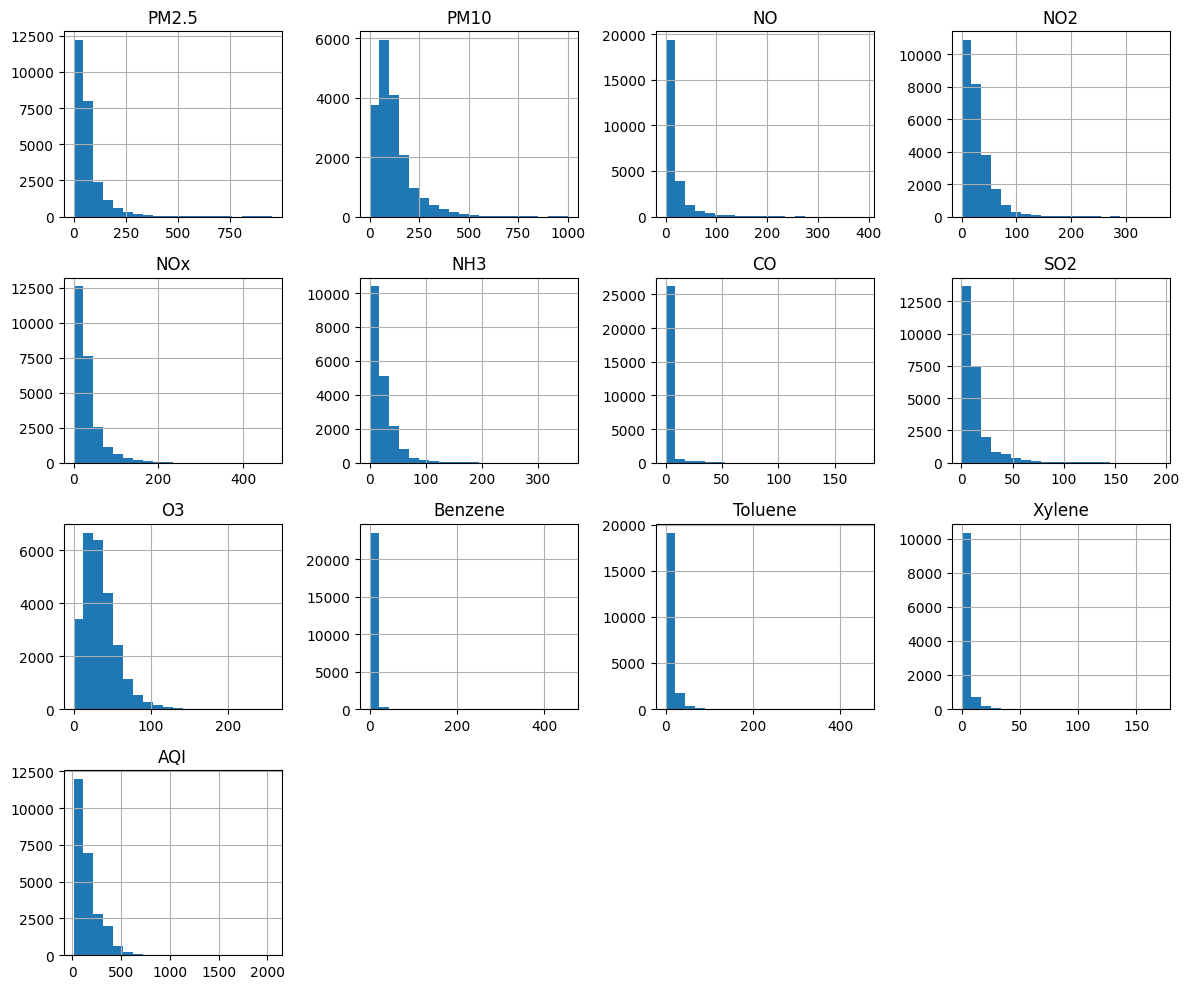

In [17]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# **Data Cleaning**

In [18]:
df.drop(columns=['Xylene','AQI_Bucket'], inplace=True)

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,Day
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,2015,1,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,2015,1,2
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,2015,1,3
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,2015,1,4
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,2015,1,5


We split the Date column and add another 3 columns year, month, day. Now don't need the date column, drop the date column

In [20]:
df.drop(columns=['Date'], inplace=True)

These columns have skewness, because of that replace null values with median

In [21]:
column = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

for i in column:
    df[i].fillna(df[i].median(), inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_3548\1616366918.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\Pc\AppData\Local\Temp\ipykernel_3548\1616366918.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [22]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,Day
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,2015,1,1
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2015,1,2
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,2015,1,3
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,2015,1,4
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,2015,1,5


In [23]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
Year       0
Month      0
Day        0
dtype: int64

# **Correlation**

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['City'])

df['City'] = le.transform(df['City'])

In [25]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,Day
0,0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,2015,1,1
1,0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2015,1,2
2,0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,2015,1,3
3,0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,2015,1,4
4,0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,2015,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,2020,6,27
29527,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,2020,6,28
29528,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,2020,6,29
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,2020,6,30


Text(0.5, 1.0, 'Correlation Matrix')

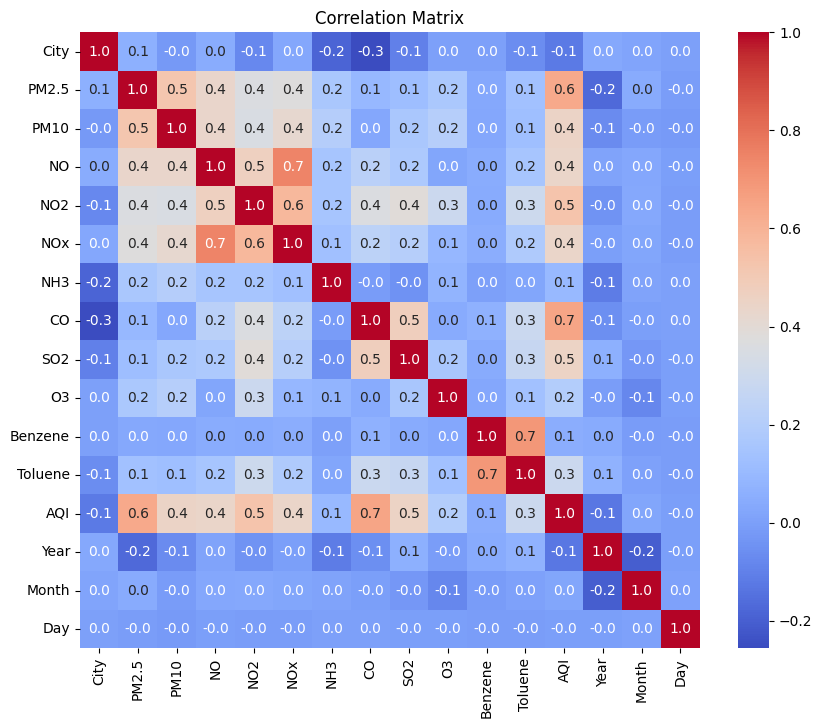

In [26]:
import seaborn as sns
plt.figure(figsize=(10,8))

corr = df.corr()

sns.heatmap(corr, annot=True, fmt='0.01f', cmap='coolwarm')
plt.title('Correlation Matrix')

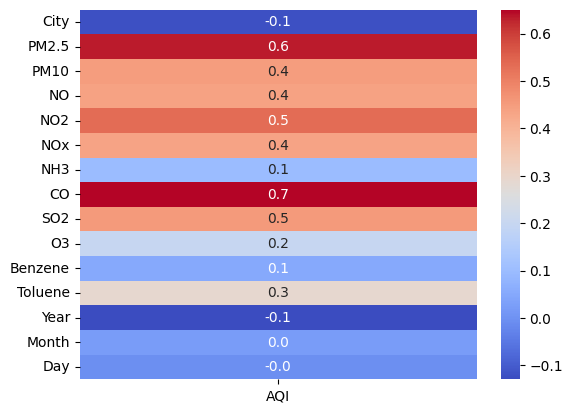

In [27]:
corr = df.corr()['AQI']
corr = corr.drop('AQI')

sns.heatmap(corr.to_frame(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [28]:
s = df.corr()['AQI']
s.sort_values(ascending=False)

AQI        1.000000
CO         0.650475
PM2.5      0.633654
NO2        0.531952
SO2        0.454182
PM10       0.447686
NO         0.438039
NOx        0.436282
Toluene    0.288749
O3         0.199100
NH3        0.097916
Benzene    0.052027
Month      0.021516
Day       -0.004507
City      -0.121778
Year      -0.129244
Name: AQI, dtype: float64

In [29]:
df.drop(columns=['Toluene','O3','NH3','Benzene','Month','Day','City','Year','NO2','NO'], inplace=True)

In [30]:
df

,PM2.5,PM10,NOx,CO,SO2,AQI
0,48.57,95.68,17.15,0.92,27.64,118.0
1,48.57,95.68,16.46,0.97,24.55,118.0
2,48.57,95.68,29.70,17.40,29.07,118.0
3,48.57,95.68,17.97,1.70,18.59,118.0
4,48.57,95.68,37.76,22.10,39.33,118.0
...,...,...,...,...,...,...
29526,15.02,50.94,19.54,0.47,8.55,41.0
29527,24.38,74.09,16.53,0.52,12.72,70.0
29528,22.91,65.73,18.33,0.48,8.42,68.0
29529,16.64,49.97,18.80,0.52,9.84,54.0


<Axes: >

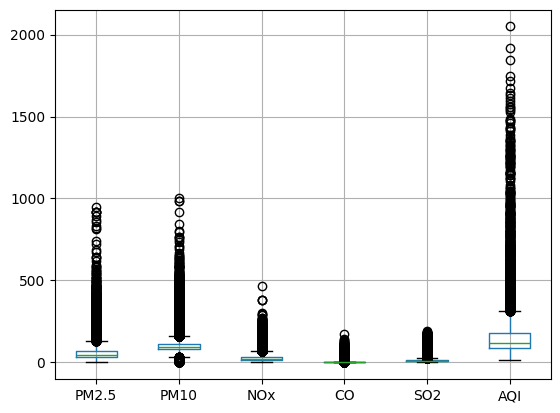

In [31]:
df.boxplot()

## **Skewness and log**

<Axes: xlabel='PM2.5', ylabel='Count'>

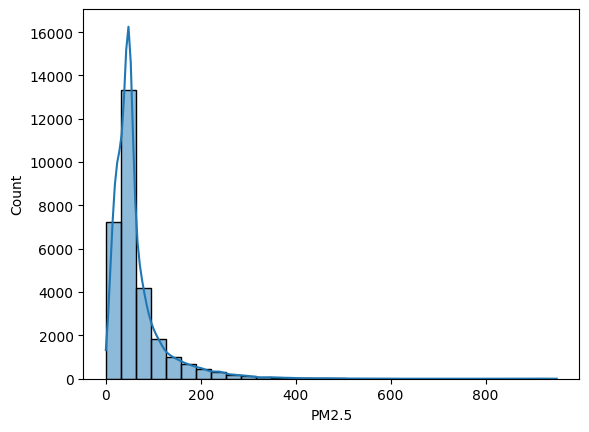

In [32]:
sns.histplot(df['PM2.5'],bins=30, kde=True)

In [33]:
df['PM2.5'] = np.log1p(df['PM2.5'])

<Axes: xlabel='PM10', ylabel='Count'>

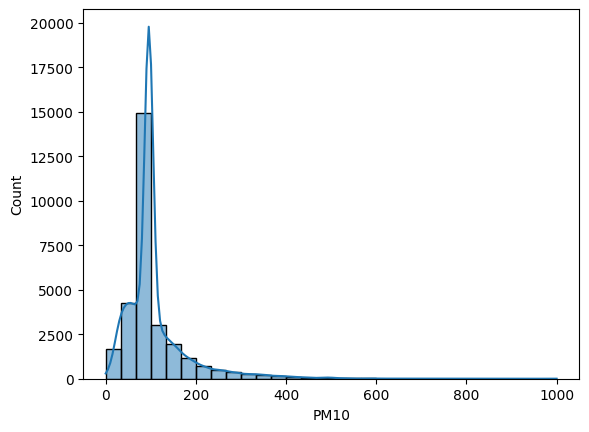

In [34]:
sns.histplot(df['PM10'],bins=30, kde=True)

In [35]:
df['PM10'] = np.log1p(df['PM10'])

<Axes: xlabel='NOx', ylabel='Count'>

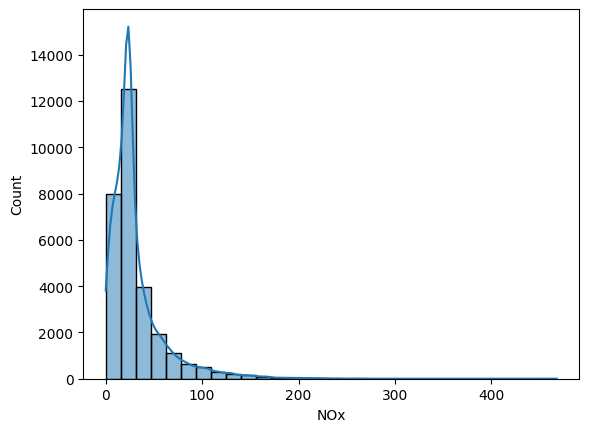

In [36]:
sns.histplot(df['NOx'],bins=30, kde=True)

In [37]:
df['NOx'] = np.log1p(df['NOx'])

<Axes: xlabel='CO', ylabel='Count'>

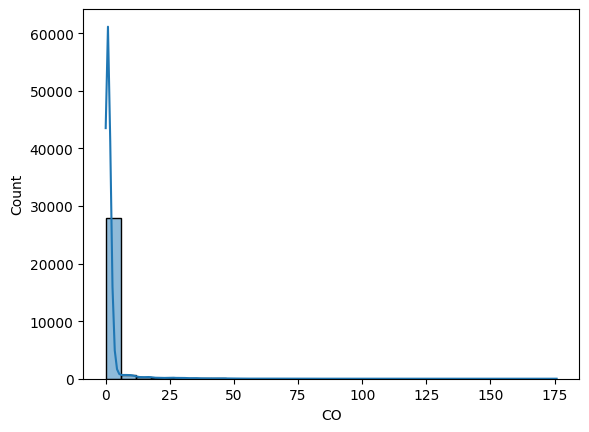

In [38]:
sns.histplot(df['CO'],bins=30, kde=True)

In [39]:
df['CO'] = np.log1p(df['CO'])

<Axes: xlabel='SO2', ylabel='Count'>

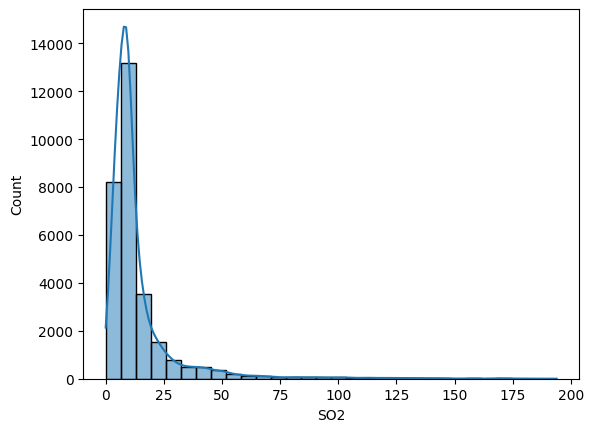

In [40]:
sns.histplot(df['SO2'],bins=30, kde=True)

In [41]:
df['SO2'] = np.log1p(df['SO2'])

<Axes: xlabel='AQI', ylabel='Count'>

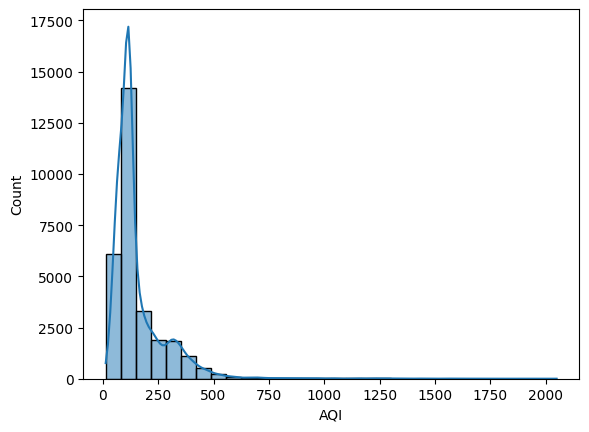

In [42]:
sns.histplot(df['AQI'],bins=30, kde=True)

In [43]:
df['AQI'] = np.log1p(df['AQI'])

## **Outliers**

<Axes: >

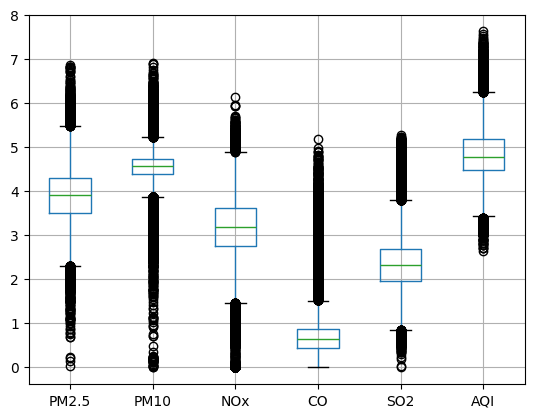

In [44]:
df.boxplot()

In [45]:
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, exclude_column='AQI')
df_cleaned

,PM2.5,PM10,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.942859,0.993252,2.975019,4.779123
14,3.903386,4.571407,2.867899,0.470004,3.397524,4.779123
34,4.402442,4.571407,3.218876,1.214913,3.285787,5.686975
...,...,...,...,...,...,...
29526,2.773838,3.950089,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,2.961658,0.392042,2.242835,4.234107
29529,2.870169,3.931237,2.985682,0.418710,2.383243,4.007333


In [46]:
df_cleaned = df

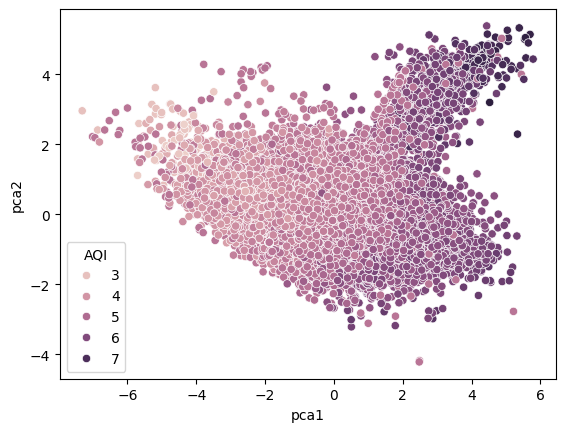

In [47]:
from sklearn.preprocessing import StandardScaler

features = ['PM2.5', 'PM10', 'NOx', 'CO', 'SO2']
scaler = StandardScaler().fit_transform(df[features])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaler)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

sns.scatterplot(x='pca1', y='pca2',hue="AQI", data=df)
plt.show()

In [48]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ['PM2.5', 'PM10', 'NOx', 'CO', 'SO2']

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

# **Model Training and Testing**

Mean Squared Error (MSE): 0.04698778468305101
Root Mean Squared Error (RMSE): 0.21676665952828403
R-squared (R2): 0.8700697061651851


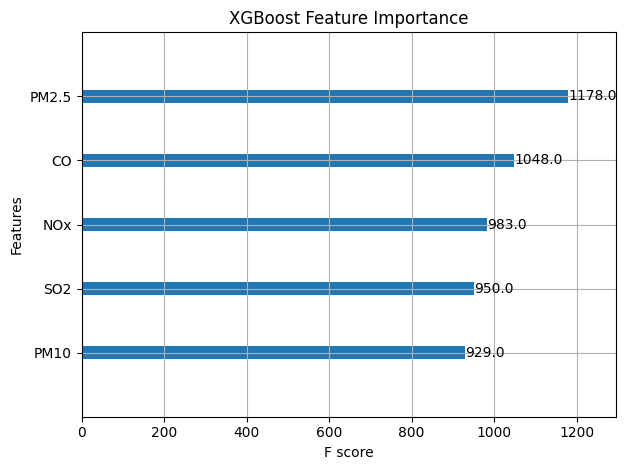

In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Separate features (scaled data) and target (AQI)
X = scaled_df  # Features (make sure 'scaled_df' is preprocessed)
y = df['AQI']  # Target variable

# Step 2: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize XGBoost Regressor
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1
)

# Step 4: Train the model
xg_reg.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = xg_reg.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)        # Mean Squared Error
rmse = np.sqrt(mse)                             # Root Mean Squared Error (manual)
r2 = r2_score(y_test, y_pred)                   # R-squared score

# Print Evaluation Metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Step 7: Feature Importance Plot
xgb.plot_importance(xg_reg)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [55]:
import pickle

# Save the trained model using pickle
with open('xgboost_aqi_model.pkl', 'wb') as file:
    pickle.dump(xg_reg, file)

print("Model saved as 'xgboost_aqi_model.pkl'")

Model saved as 'xgboost_aqi_model.pkl'
